In [15]:
import pandas as pd

In [16]:
data=pd.read_csv('./文具市场购物篮案例练习/工作/StationeryOrder.csv', encoding='gbk')
data

id stationery
0         1         笔袋
1         1        文件套
2         1         钢笔
3         2        电脑夹
4         2         橡皮
...     ...        ...
40050  9834      无线装订本
40051  9835      无孔文件夹
40052  9835        圆珠笔
40053  9835        修正带
40054  9835         橡皮

[40055 rows x 2 columns]

In [17]:
def add_bracket(data):
    return [data]
data['stationery']=data['stationery'].agg(add_bracket)
data


id stationery
0         1       [笔袋]
1         1      [文件套]
2         1       [钢笔]
3         2      [电脑夹]
4         2       [橡皮]
...     ...        ...
40050  9834    [无线装订本]
40051  9835    [无孔文件夹]
40052  9835      [圆珠笔]
40053  9835      [修正带]
40054  9835       [橡皮]

[40055 rows x 2 columns]

In [18]:
data=data.groupby(['id'])['stationery'].sum()
data=data.to_frame(name='stationery')
data.reset_index(inplace=True)
data




id                                         stationery
0        1                                      [笔袋, 文件套, 钢笔]
1        2                                     [电脑夹, 橡皮, 便利贴]
2        3                                              [中性笔]
3        4                                    [水彩笔, 复写纸, 便利贴]
4        5                               [包装用品, 书立, 圆珠笔, 中性笔]
...    ...                                                ...
9641  9830                         [文件篮, 订书机, 圆珠笔, 无线装订本, 橡皮]
9642  9831  [档案盒, 证书系列, 无孔文件夹, 印章箱, 笔袋, 电脑夹, 凭证单据, 记号笔, 墨水...
9643  9833   [证书系列, 无孔文件夹, 笔袋, 票据装订机, 订书机, 胶带座, 圆珠笔, 铅笔, 便利贴]
9644  9834                               [便签纸, 胶带, 钢笔, 无线装订本]
9645  9835                              [无孔文件夹, 圆珠笔, 修正带, 橡皮]

[9646 rows x 2 columns]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9646 entries, 0 to 9645
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          9646 non-null   int64 
 1   stationery  9646 non-null   object
dtypes: int64(1), object(1)
memory usage: 150.8+ KB


In [20]:
from apyori import apriori as apr
results=apr(transactions=data['stationery'],min_support=0.02,min_confidence=0.45)
extract_data=[]
for result in results:
   support=round(result.support,2)
   for rule in result.ordered_statistics:
        former=list(rule.items_base)
        latter=list(rule.items_add)
        if former==[]:
            continue 
        confidence=round(rule.confidence,2)
        lift=round(rule.lift,2)
        related_set=str(former)+'→'+str(latter)
        element=[related_set,support,confidence,lift]
        extract_data.append(element)
DataFrame_of_result=pd.DataFrame(extract_data,columns=('关联关系','支持度','置信度','提升度')).sort_values(by='置信度',ascending=False).reset_index(drop=True)
DataFrame_of_result

关联关系   支持度   置信度   提升度
0  ['圆珠笔', '便利贴']→['中性笔']  0.02  0.51  1.97
1        ['证书系列']→['中性笔']  0.03  0.50  1.91
2       ['会议记录本']→['中性笔']  0.03  0.49  1.88
3  ['活页本', '圆珠笔']→['中性笔']  0.02  0.49  1.88
4         ['订书机']→['中性笔']  0.03  0.47  1.81
5  ['活页本', '中性笔']→['圆珠笔']  0.02  0.47  2.40

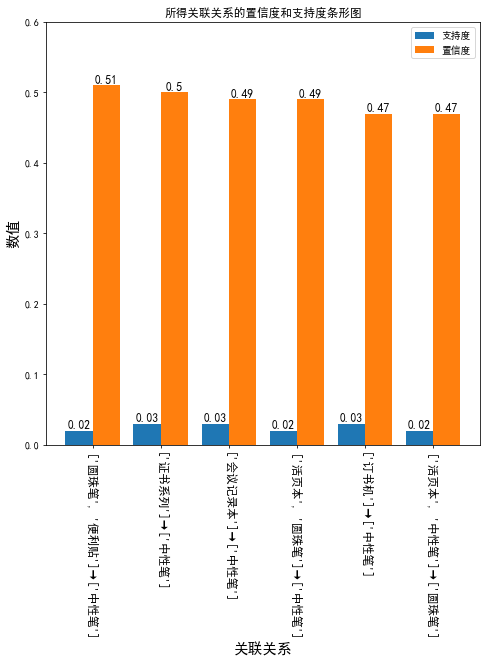

In [21]:
from matplotlib import pyplot as plt 
import numpy as np
plt.rcParams['font.family']=['SimHei']
plt.figure(num=1,figsize=(8,8),dpi=70)

width = 0.4
x=DataFrame_of_result.index
y1=DataFrame_of_result['支持度']
y2=DataFrame_of_result['置信度']
plt.bar(x-width/2,y1,label='支持度',width=0.4)
plt.bar(x+width/2,y2,label='置信度',width=0.4)
plt.xlabel('关联关系', fontsize=15)
plt.ylabel('数值', fontsize=15)
plt.title('所得关联关系的置信度和支持度条形图')
plt.xticks(DataFrame_of_result.index,DataFrame_of_result['关联关系'],fontsize=12,rotation=270)
for a,b in zip(x-width/2,y1):
    plt.text(a,b,b,ha='center', va='bottom',fontsize=12)
for c,d in zip(x+width/2,y2):
    plt.text(c,d,d,ha='center', va='bottom',fontsize=12)
plt.legend()
plt.ylim(0,0.6)
plt.show()